# Test de recrutement data 354 //Aleks D. Nougbele //20/06/2019
Ce notebook comprend une phase d'exploration des donnees qui a pour but de comprendre les grandes relation internes entre les données


In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt


In [3]:
#df=pd.read_csv('https://query.data.world/s/2fztwklxyjoqidme3btvafdjfr65ee')
df=pd.read_csv('./beer_reviews.csv')


In [5]:
#def medianfinder(column_name): 
#    return df[str(column_name)].median()
#print(medianfinder("brewery_id "))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB
None


On voit dans la cellule précedente les differentes colonnes présentes dans la base de données 
On constate qu'il s'agit d' un ensemble de commentaires realisés sur un ensemble de bieres.on voit sur la premiere colonne toutes les colonne présente.<br>
Au regard de ces données on peut regrouper les évaluation comme representées par le overall rate
il nous reste la composante de la brasserie du type de biere, du style et du taux de abv.<br>
il faut aussi comprendre si les utilisateurs ont évalués toute les bière?<br>
Le nombre d'evaluation est un facteur important à prendre en compte.Si un bière /brasserie a reçu une centaine de recommandations elle ne peut pas être comparée à une autre sur le point de la moyen des évaluations(une partie des informations est alors manquante).<br>
Les questions qui nous viennent directement en tête peuvent être les suivantes.<br>
On peut se poser la question de savoir combien de brasseries il existe dans cette base de donnees?<br>
Combien de type de biere sont presentes ?<br>
Quelle est la repartition de biere par brasserie?<br>


                                   brewery_name  count
5741                       Łódzkie Browary S.A.      1
732                            Brasserie Alauna      1
2389                                     Gio'Bi      1
2382                         Giessener Brauhaus      1
737          Brasserie Artisanale De L'Ermitage      1
4497                         Rooney's Irish Pub      1
4503                   Roppelt-Bräu Trossenfurt      1
4506               Rosen Brewery and Restaurant      1
4508                                    Rosinka      1
749     Brasserie Artisanale Savoyarde - B.A.S.      1
2353                Gasthausbrauerei Stanglbräu      1
758                         Brasserie Basabürüa      1
4509                                Roskilde Øl      1
2348                             Garton Brewery      1
2341                               Gallia Omnia      1
2329                                 Færgekroen      1
2328  Fábrica de Cerveza Artesanal Viejo Munich      1
769       

<IPython.core.display.Javascript object>


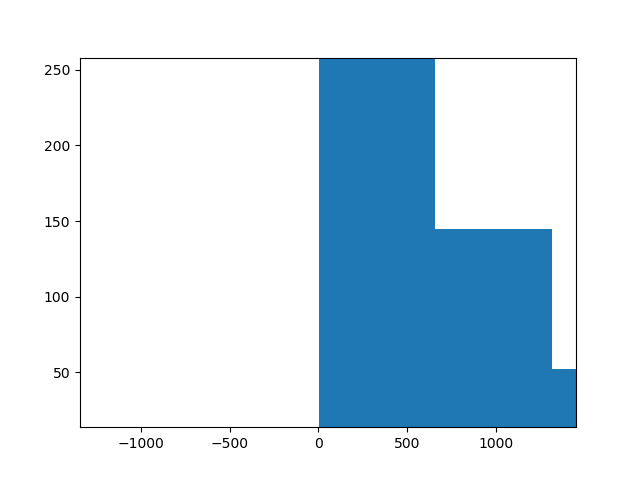

(array([5.375e+03, 1.450e+02, 5.200e+01, 4.200e+01, 2.400e+01, 1.600e+01,
        1.200e+01, 1.600e+01, 8.000e+00, 6.000e+00, 6.000e+00, 7.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 6.58383333e+02, 1.31576667e+03, 1.97315000e+03,
        2.63053333e+03, 3.28791667e+03, 3.94530000e+03, 4.60268333e+03,
        5.26006667e+03, 5.91745000e+03, 6.57483333e+03, 7.23221667e+03,
        7.88960000e+03, 8.54698333e+03, 9.

In [7]:
#for i in df.columns.values:
nombre_brasserie=df.groupby(['brewery_name']).size().reset_index(name='count')#compte combien de notation on a pour chaque brasserie
nombre_brasserie=nombre_brasserie.sort_values('count')
print(nombre_brasserie)

fig, axes = plt.subplots()
plt.hist(nombre_brasserie['count'],bins=60)
#nombre_brasserie.plot('bar',figsize =(15,15))


Nous avons 5742 brasseries qui sont tres inequitablement reparties en terme de nombre de commentaire.<br>
On voit que les brasseries les plus notees sont : <br>
Boston Beer Company (Samuel Adams)  39444 <br>
Dogfish Head Brewery  33839 <br>
Stone Brewing Co.  33066 <br>
Sierra Nevada Brewing Co.  28751 <br>
  Bell's Brewery, Inc.  25191 <br>
   Rogue Ales  24083  <br>
Les moins notées aexquo sont entre autres:<br>
                       Łódzkie Browary S.A.      1<br>
                            Brasserie Alauna      1<br>
                                    Gio'Bi      1<br>
                        Giessener Brauhaus      1<br>
        Brasserie Artisanale De L'Ermitage      1<br>
                       Rooney's Irish Pub      1<br>
 Nous allons nous interesser maintenant au nombre de bière par brasserie.
 

In [8]:
nombre_beer_p_brasserie=df.groupby(['brewery_name','beer_name']).size().reset_index(name='counts').groupby(['brewery_name']).size().reset_index(name='counts')


<IPython.core.display.Javascript object>


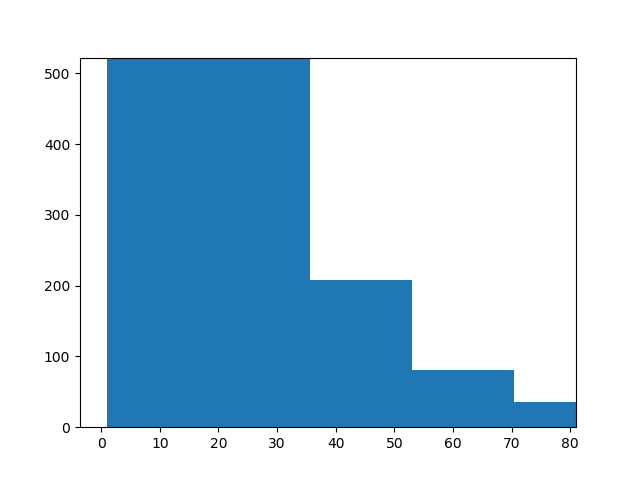

(array([4.826e+03, 5.280e+02, 2.080e+02, 8.100e+01, 3.600e+01, 2.400e+01,
        1.400e+01, 7.000e+00, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  18.34,  35.68,  53.02,  70.36,  87.7 , 105.04, 122.38,
        139.72, 157.06, 174.4 , 191.74, 209.08, 226.42, 243.76, 261.1 ,
        278.44, 295.78, 313.12, 330.46, 347.8 , 365.14, 382.48, 399.82,
        417.16, 434.5 , 451.84, 469.18, 486.52, 503.86, 521.2 , 538.54,
        555.88, 573.22, 590.56, 607.9 , 625.24, 642.58, 659.92, 677.26,
        694.6 , 

In [12]:
#nombre_beer_p_brasserie.counts.mean()
#nombre_beer_p_brasserie.counts.median()
d=nombre_beer_p_brasserie.counts*0
dd=(d+1)*nombre_beer_p_brasserie.counts.mean()
fig, axes = plt.subplots()
plt.hist(nombre_beer_p_brasserie.counts,bins=50)


le nombre de bière par brasserie nous indique qu'il existe de nombreuse brasseuries avec très peu de bières. <br>On va s'intéresser au nombre de commentaires par biere.


In [8]:
reviews_beer=df.groupby(['beer_name']).size().reset_index(name='count').sort_values('count')
print(reviews_beer)
print("la moyenne et la mediane sont de ",reviews_beer['count'].mean(),reviews_beer['count'].median())

                                               beer_name  count
0                                            ! (Old Ale)      1
28573                                 Kraken Malt Liquor      1
28569                                      Krajan Ciemne      1
28562                               Kraftbräu Scotch Ale      1
28560          Kraftbräu Robbie O'Soundman's Irish Stout      1
28559                          Kraftbräu Raspberry Wheat      1
28558                                   Kraftbräu Porter      1
28555                             Kraftbräu Imperial IPA      1
28554                       Kraftbräu Hoppity Boop Lager      1
28548                            Kraftbräu Dark Bohemian      1
28546            Kraftbräu Celery City Dortmunder Export      1
28545                                Kraftbräu Brown Ale      1
28541                        Kraftbräu Blackberry Dunkel      1
28540                           Kraftbräu Biere De Garde      1
28538                                  K

la moyenne et la mediane sont  27.905341470707214 3.0


<IPython.core.display.Javascript object>


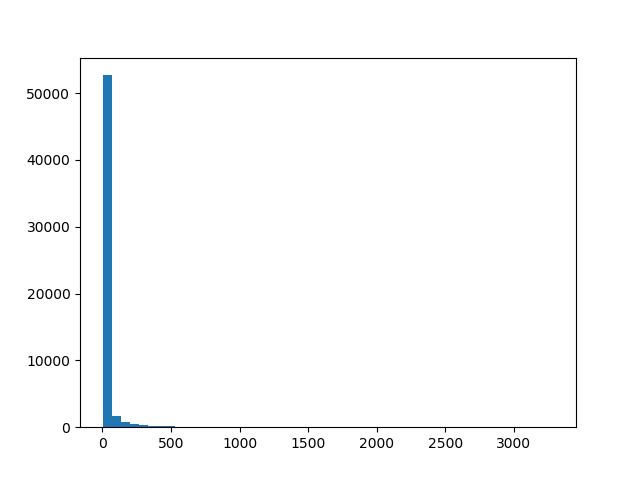

In [418]:
#bin_edges=range(0,56857,1000)
moyenne=reviews_beer['count'].mean()
mediane=reviews_beer['count'].median()
print('la moyenne et la mediane sont ',moyenne,mediane)
reviews_beer=reviews_beer.reset_index(drop=True)
#reviews_beer
fig, axes = plt.subplots()
#plt.hist(reviews_beer['count'])
plt.hist(reviews_beer['count'],bins=50)
plt.show()

On voit que la moyenne est de 27 et que la mediane est a 3 avec le maximum de commentaire a 3290.
<br>cet histogramme associé aux information precedentes nous montre que la majorite des bieres ne recoivent que tres peut de commentaire
Mettons des chiffres sur cette repartition. la proportion de beer presentes qui ont plus de 27 commentaire

In [10]:
reviews_beer[reviews_beer['count']>27].agg('sum')['count']/1586614 # le membre de droite est le nombre de linge qu'on a definint plus haut 
#reviews_beer.filter(filterr)

0.8646450869587688


Interessons nous maintenant au style de beer. Au moment de choisir une boisson on peut ne pas avoir de beer favorite mais savoir quelle style on veut. Cela peut influencer les notations.

In [11]:
df.groupby(['beer_style','beer_name']).size() 

beer_style  beer_name                                                      
Altbier     "Alt"ered State                                                      2
            "Nein Toll Bier" German Alt                                          1
            'Sconnie Rustic Trail Amber                                          2
            (512) Alt                                                           11
            2010 Cleveland Beer Week Collaboration Altbier (w/ Cornerstone)      5
            2011 Cleveland Beer Week Hoppy German-Style Altbier                  5
            3 Ravens Blond                                                      20
            3 Ravens Über Blond Sticke Altbier                                   7
            3rd. St. Alt                                                         1
            5 Year Alt                                                           1
            84/09 Double Alt (25th Anniversary Beer)                            43
           

Regardons la repartition de biere par style et la moyenne de chaque style


In [12]:
stylebeer=df.groupby(['beer_style'])['review_overall'].mean().reset_index(name='moyenne_des_notes').sort_values('moyenne_des_notes')
stylebeer#['review_overall'].sum()


,beer_style,moyenne_des_notes
77,Low Alcohol Beer,2.578268
13,American Malt Liquor,2.678854
76,Light Lager,2.698833
54,Euro Strong Lager,2.862518
64,Happoshu,2.914938
1,American Adjunct Lager,3.001659
34,Chile Beer,3.113298
69,Japanese Rice Lager,3.119987
53,Euro Pale Lager,3.202775
72,Kvass,3.355219


In [13]:
stylenotation=df.groupby(['beer_style']).size().reset_index(name='nombre_de_notation').sort_values('nombre_de_notation')
stylenotation#['review_overall'].sum()

,beer_style,nombre_de_notation
64,Happoshu,241
72,Kvass,297
88,Roggenbier,466
56,Faro,609
62,Gose,686
48,English Pale Mild Ale,700
32,Braggot,1040
28,Bière de Champagne / Bière Brut,1046
91,Sahti,1061
75,Lambic - Unblended,1114


Nous savons qu'il existe une tres forte disparite entre le nombre de commentaire par biere. Comparer les style de biere par rapport au notes donnes necessite d'avoir plus ou moins un seuil de commentaire par biere et de biere par style de biere.
Nous allons alors filtrer les bieres avec peu de commentaire(<400)et comparer les moyennes des notes par style. Affaire !!!!!!!


In [14]:
c=df.groupby(['beer_name','beer_style','review_overall']).size().reset_index(name='count').sort_values('count')
c=c[c['count']>400]
fig, axes = plt.subplots()
#axes.plot(range(10))

plt.hist(c['count'])

<IPython.core.display.Javascript object>

(array([101.,  60.,  48.,  31.,  22.,   8.,  11.,   8.,   9.,   2.]),
 array([ 401. ,  482.4,  563.8,  645.2,  726.6,  808. ,  889.4,  970.8,
        1052.2, 1133.6, 1215. ]),
 <a list of 10 Patch objects>)

Apres avoir a regardé un peu plus précisement le jeu de donnees. Nous allons repondres aux questions.


## Quelle brasserie produit les bières les plus fortes selon ABV% ?

![title](./SAKETIMES_Infographics_abv_v1.png)

Il exist un certains nombre de notation sans indication sur le taux d'alcool.<br>
considerons l'ensemble des notation qui contiennent cette information

In [15]:
c=df.isna()['beer_abv']
df.groupby(['brewery_name','beer_name','beer_abv']).size().reset_index(name='count').sort_values('beer_abv')

,brewery_name,beer_name,beer_abv,count
13601,Companhia Cervejaria Brahma,Liber,0.01,3
9827,Brouwerij Lindemans,Lindemans Chello,0.01,2
3179,Bavaria Brouwerij N.V.,Bavaria Malt,0.05,2
1815,Arcobräu Gräfliches Brauhaus,Arcobräu Non-Alcoholic Pale Weiss,0.05,1
19375,Genesee Brewing Co. / Dundee Brewing Co.,Genesee NA,0.05,10
3237,Bayerische Staatsbrauerei Weihenstephan,Xan Wellness,0.05,1
1532,Anheuser-Busch,Budweiser NA,0.05,2
38094,Royal Unibrew A/S,Faxe Free,0.05,1
7012,Brasserie Piedboeuf,Jupiler Force,0.08,1
12399,Cervecería Bavaria,Pony Malta,0.10,1


La boisson la plus forte est le Schorschbräu representant la brasserie Schorschbräu http://www.schorschbraeu.de/ qui se positionne comme potitielle candidat pour etre la brasserie avec le plus fort taux d'alcool.
![title](Schorschbock-57-033-quadrat.jpg)

In [16]:
dfabv=df[c==False]
dfabv

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
5,1075,Caldera Brewing Company,1325524659,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159
6,1075,Caldera Brewing Company,1318991115,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,1075,Caldera Brewing Company,1306276018,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,1075,Caldera Brewing Company,1290454503,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,1075,Caldera Brewing Company,1285632924,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159


In [17]:
67785/1586614

0.042723056773733246

Nous parlons ici que de 4 % de l'ensemble des notations qui seront retirées.

In [18]:
fig, axes = plt.subplots()
plt.hist(dfabv['beer_abv'])

<IPython.core.display.Javascript object>

(array([5.62004e+05, 9.06331e+05, 4.35060e+04, 6.31100e+03, 4.83000e+02,
        1.05000e+02, 1.00000e+01, 7.80000e+01, 0.00000e+00, 1.00000e+00]),
 array([1.0000e-02, 5.7790e+00, 1.1548e+01, 1.7317e+01, 2.3086e+01,
        2.8855e+01, 3.4624e+01, 4.0393e+01, 4.6162e+01, 5.1931e+01,
        5.7700e+01]),
 <a list of 10 Patch objects>)

On voit que la grande majorite des bieres est en dessous des 10% d'alcool.(c'est ce qu'on attend pour une "biere".)
La question de la brasserie qui produit les bieres les plus fortes peut se comprendre de differentes maniere.
D'abord il faudrait qu'une brasserie produisent plus d'une biere ou plus qu'un certain seuil(on pense tout de suite a la mediane). <br>
Deuxiemement qu'elle metrique utilisé pour comparer les brasseries? La moyenne des abv, la mediane, la proportion de biere forte qu'on definirait par un seuil sur le abv?<br>
Jettons un oeil aux differents resultat de toutes ces methodes


In [19]:
c=dfabv.groupby(['brewery_name','beer_name','beer_abv'])['beer_name'].size().reset_index(name='nbbeer').sort_values('nbbeer')
c.groupby(['brewery_name'])['beer_abv'].mean().reset_index(name='moyabv').sort_values('moyabv')
#sup4=dfabv.groupby(['brewery_name','beer_name'])['beer_name'].count().reset_index(name='nbbeer').sort_values('nbbeer')#.filter(lambda x:x['nbbeer']>)#['beer_abv'].mean().reset_index(name='moyenne_des_pourcentage_dalcool').sort_values('moyenne_des_pourcentage_dalcool')
#c=sup4[sup4['nbbeer']>4]
#brewery_moyabv=dfabv[dfabv.brewery_name.isin(c['brewery_name'])].groupby(['brewery_name'])['beer_abv'].mean().reset_index(name='moyabv').sort_values('moyabv')
#brewery_moyabv
#type(c)

#sup4['brewery_name'].iloc['Fürstliches Brauhaus Ellinge']# Fürstliches Brauhaus Ellinge
#dfabv[dfabv['brewery_name']=='Fürstliches Brauhaus Ellingen'] #afin de verifier le code precedent

,brewery_name,moyabv
94,All Stars Bakery,0.500000
629,Borodino ZAO,0.850000
1983,Fentimans Ltd.,1.666667
661,Brasserie Almaza S.A.L.,2.257143
4238,Shandong Taishan Beer Co Ltd,2.500000
1456,"Cerveceria Vegana, S.A.",2.750000
3223,Melo Abreu / Fabrica de Cervejas e Refrigerantes,2.900000
3838,Portsmouth Brewing Co. / Mault's Brewpub,3.000000
1065,Braumanufaktur Forsthaus Templin,3.000000
4557,Tarricone S.p.A.,3.000000


In [20]:
c.groupby(['brewery_name'])['beer_abv'].median().reset_index(name='medianabv').sort_values('medianabv')
#dfabv.groupby(['brewery_name'])['beer_abv'].median().reset_index(name='median_des_pourcentage_dalcool').sort_values('median_des_pourcentage_dalcool')

,brewery_name,medianabv
94,All Stars Bakery,0.50
1983,Fentimans Ltd.,0.50
661,Brasserie Almaza S.A.L.,0.50
629,Borodino ZAO,0.85
4238,Shandong Taishan Beer Co Ltd,2.50
1456,"Cerveceria Vegana, S.A.",2.75
3223,Melo Abreu / Fabrica de Cervejas e Refrigerantes,2.90
4937,Warsteiner Brauerei,2.90
3838,Portsmouth Brewing Co. / Mault's Brewpub,3.00
1065,Braumanufaktur Forsthaus Templin,3.00


Ces deux classements  conservent a leur tête Schorschbräu. <br>Cette brasserie peut definitivement proter le titre de la brasserie qui produits les bières les plus alcoolisées.


## Si vous deviez recommander 3 bières avec seulement ces données, lesquels choisiriez-vous ?

Pour repondre a cette question nous allons utiliser un systeme de recommendation base sur le filtre collectif.
Nous allons definir des criteres sous jacent pour chaque biere X\[i\]<br>
Chaque utilisateur va alors lui voir affecter un vecteur Theta\[j\] propre a sa sensibilite sur chaque parametre.
<br>
On a alors une evaluation comme le produit matricielle entre ces deux vecteurs.
<br>


![title](capture.jpg)

En faisant un paralelle avec le tableau nous allons definir une matrice qui regroupera toutes les notation(review_overall) et les utilisateurs qui les ont emis.<br>
Mais il ne faut pas oublier que nous manipulons une base avec 1 millions de commentaire.<br>
Faisons un peut le menages. Quelles sont nos leviers d'actions. Nous recherchons la meilleure biere dans notre base de données.Elles doit avoir plus d'un certains nombre de commentaire.<br>
De plus, les utilisateurs qui s'accorderont a l'elire doivent etre des experts donc avec un certains nombre de commentaire deja<br>.
Cette algorithme nous permettra de definir des notations pour toutes les bières par tous les utilisateurs. Nous pourrons alors choisir la bière avec la meilleure note globale


2.0 24.019589735826205


<IPython.core.display.Javascript object>


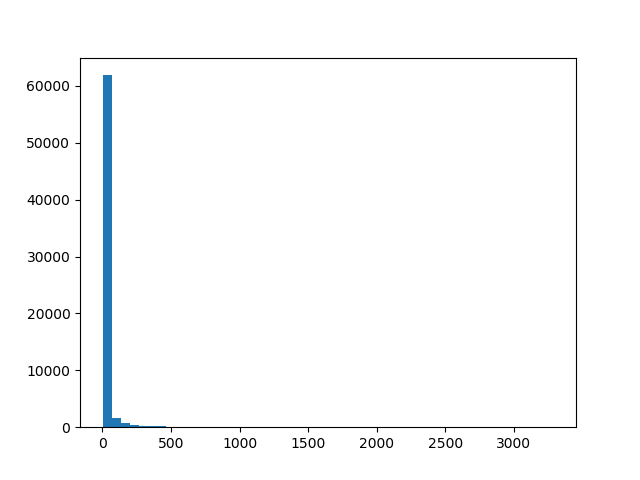

(array([6.1878e+04, 1.6840e+03, 7.4600e+02, 4.2300e+02, 2.9400e+02,
        2.1700e+02, 1.5200e+02, 1.0400e+02, 7.9000e+01, 7.7000e+01,
        7.2000e+01, 3.7000e+01, 3.8000e+01, 3.7000e+01, 1.8000e+01,
        2.7000e+01, 2.2000e+01, 1.3000e+01, 1.7000e+01, 1.4000e+01,
        9.0000e+00, 1.6000e+01, 8.0000e+00, 1.1000e+01, 4.0000e+00,
        8.0000e+00, 6.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 7.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 6.67800e+01, 1.32560e+02, 1.98340e+02, 2.64120e+02,
        3.29900e+02, 3.95680e+02, 4.61460e+02, 5.27240e+02, 5.93020e+02,
        6.58800e+02, 7.24580e+02, 7.90360e+02, 8.56140e+02, 9.21920e+02,
        9.87700e+02, 1.05348e+03, 1.11926e+03, 1.18504e+03, 1.25082e+03,
        1.31660e+03, 1.382

In [56]:

beer_reviews=df.groupby(['beer_beerid']).size().reset_index(name='nbreviews').sort_values('nbreviews')
beer_reviews
print(beer_reviews['nbreviews'].median(),beer_reviews['nbreviews'].mean())
fig, axes = plt.subplots()
plt.hist(beer_reviews['nbreviews'],bins=50)

3.0 47.511486506724175


<IPython.core.display.Javascript object>


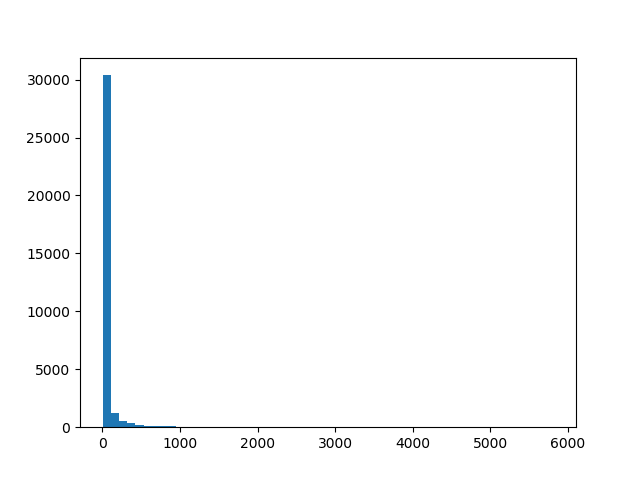

(array([3.038e+04, 1.231e+03, 5.770e+02, 3.290e+02, 2.120e+02, 1.230e+02,
        1.100e+02, 9.600e+01, 6.200e+01, 4.400e+01, 2.800e+01, 3.200e+01,
        2.100e+01, 2.800e+01, 1.300e+01, 1.600e+01, 1.500e+01, 1.000e+01,
        1.000e+01, 3.000e+00, 8.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([1.00000000e+00, 1.06745455e+02, 2.12490909e+02, 3.18236364e+02,
        4.23981818e+02, 5.29727273e+02, 6.35472727e+02, 7.41218182e+02,
        8.46963636e+02, 9.52709091e+02, 1.05845455e+03, 1.16420000e+03,
        1.26994545e+03, 1.37569091e+03, 1.48143636e+03, 1.58718182e+03,
        1.69292727e+03, 1

In [59]:

user_reviews=df.groupby(['review_profilename']).size().reset_index(name='nbreviews').sort_values('nbreviews')
user_reviews
print(user_reviews['nbreviews'].median(),user_reviews['nbreviews'].mean())
fig, axes = plt.subplots()
plt.hist(user_reviews['nbreviews'],bins=55)

Afin de rester conforme au modele verifions s'il y a des utilisateurs qui on fait plus d'un commentaire sur une biere? ouii

In [148]:
df.groupby(['review_profilename','beer_beerid','review_overall']).size().reset_index(name='nbreviews').sort_values('nbreviews')

,review_profilename,beer_beerid,review_overall,nbreviews
0,0110x011,23,3.5,1
1052525,hosehead83,62050,4.0,1
1052524,hosehead83,61703,4.0,1
1052523,hosehead83,61225,4.0,1
1052522,hosehead83,61223,4.0,1
1052521,hosehead83,61197,3.5,1
1052520,hosehead83,60846,4.0,1
1052519,hosehead83,60842,5.0,1
1052518,hosehead83,60838,4.5,1
1052517,hosehead83,60832,3.5,1


  nous ouvons  retirer tout les utilisateurs qui ont moins de 47 notations 
  et les beers qui ont moins de 25 notations. Cependant cela ne restraindrait pas assez la base considerer pour une execution rapide. <br>
  J'ai alors decidé de definir des limites extrême.
  On peut garder en tete qu'on veut proposer une bonne biere qui a deja recu plein de commentaire par de consommateur averti

In [152]:
req=df.groupby(['beer_beerid']).size().reset_index(name='nbreviews').sort_values('nbreviews')
beerassezcom=req[req['nbreviews']>2500]
#df[df['beer_beerid'].isin(beerassezcom['nbreviews'])]
req2=df.groupby(['review_profilename']).size().reset_index(name='nbrevperuser').sort_values('nbrevperuser')
userassezcom=req2[req2['nbrevperuser']>500]
dfcf=df[(df['review_profilename'].isin(userassezcom['review_profilename'])) & (df['beer_beerid'].isin(beerassezcom['beer_beerid'])) ]
len(dfcf['review_profilename'])


6092

l'intervalle des valeurs de notations

In [157]:
dfcf.groupby(['review_overall']).size()

review_overall
1.0       1
1.5      12
2.0      21
2.5      55
3.0     193
3.5     514
4.0    2074
4.5    2342
5.0     880
dtype: int64

nous decidons de realiser l'algorithme "a la main" c'est a dire sans l'aide d'un module special. 
<br> Cette decision est prise pour mieux expliquer les différentes étapes de l'algorithme et mieux maitriser l'exécution.
<br>Les etapes de l'algorithmes sont les suivants:<br>
definition de la matrice de croisement entre utilisateur et bière
<br>definition de la fonction de cout
<br>optimisation par la methode du gradient descendant
<br> Choix des meilleurs parametre sur un ensemble de cross validation
<br>*il est important de noter que les valeurs n'ont pas besoin d'etre mise a l'echelle parce qu'elles sont deja comprise entre 1 et 5.


In [153]:
mat=[]
d=dfcf.groupby(['review_profilename','beer_name','review_overall']).size().reset_index(name='dfd')
user=d['review_profilename'].unique()
beer=d['beer_name'].unique()
#print(len(beer)) 56856
#for i in xx:
index=1;
for i in user:
    print(i)
    userarray=[]
    for j in beer:
        temp=d[(d['review_profilename']==i)&(d['beer_name']==j)]
        if(not temp.empty):
                
            userarray.append(temp['review_overall'].mean())
            print('insertion')
        else:
            userarray.append(-1)
            print('not reviewed')
    
    mat.append(userarray)
print('letableau',mat)
        
    #np.append()
    #print(d[d['review_profilename']==str(i)]['beer_name'].unique())
    
       # print(i,j)

   # np.append(mat,df[df['review_profilename']==str(i)]['beer_name'])
#mat

ADR
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
not reviewed
not reviewed
ADZA
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
not reviewed
AKBelgianBeast
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
ATLbeerDog
insertion
insertion
insertion
not reviewed
not reviewed
not reviewed
not reviewed
not reviewed
not reviewed
not reviewed
ATPete
not reviewed
not reviewed
not reviewed
insertion
insertion
not reviewed
not reviewed
insertion
not reviewed
insertion
Absumaster
insertion
insertion
insertion
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
AdamBear
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
AgentMunky
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
not reviewed
AgentZero
insertion
insertion
insertion
insertion
insertion
n

insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Cresant
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Crosling
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
CuriousMonk
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Cyberkedi
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
DCon
insertion
insertion
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
DIM
insertion
not reviewed
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
DaPeculierDane
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
Damian
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Daniellobo
insertion
insertion
i

not reviewed
insertion
insertion
insertion
insertion
ImperialScott
insertion
insertion
insertion
not reviewed
insertion
not reviewed
insertion
insertion
insertion
not reviewed
IntriqKen
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
IrishRedRock
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
IronCitySteve
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
IronDjinn
insertion
insertion
insertion
not reviewed
not reviewed
insertion
insertion
not reviewed
insertion
not reviewed
JAXSON
not reviewed
not reviewed
not reviewed
insertion
insertion
not reviewed
insertion
not reviewed
not reviewed
not reviewed
JDV
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
JISurfer
not reviewed
not reviewed
insertion
not reviewed
insertion
insertion
not reviewed
not reviewed
not reviewed
not reviewed
Jam

insertion
insertion
Pegasus
insertion
insertion
insertion
not reviewed
insertion
insertion
not reviewed
insertion
insertion
not reviewed
Pencible
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
PeprSprYoFace
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Phatz
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Phelps
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
Phyl21ca
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
PittBeerGirl
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
insertion
PorterLambic
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
not reviewed
insertion
Proteus93
insertion
insertion
insertion
insertion
insertion
insertion
insertion


insertion
UncleJimbo
insertion
insertion
not reviewed
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
UnionMade
insertion
not reviewed
not reviewed
insertion
insertion
insertion
not reviewed
insertion
not reviewed
insertion
Urbancaver
insertion
insertion
not reviewed
insertion
insertion
not reviewed
not reviewed
insertion
not reviewed
insertion
Vancer
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
Vdubb86
insertion
not reviewed
insertion
insertion
not reviewed
not reviewed
not reviewed
insertion
not reviewed
insertion
Viggo
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
ViveLaChouffe
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
not reviewed
WVbeergeek
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
WakeandBake
insertion
insertion
insertion
insertion
ins

insertion
insertion
insertion
insertion
insertion
birchstick
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
bjohnson
insertion
insertion
insertion
not reviewed
insertion
not reviewed
insertion
insertion
insertion
insertion
blackie
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
blitheringidiot
insertion
insertion
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
not reviewed
bluejacket74
insertion
insertion
insertion
not reviewed
insertion
not reviewed
insertion
insertion
insertion
insertion
bluemoonswoon
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
bobsy
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
bonkers
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
bort11
insertion
insertion
insertion
i

insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
insertion
dsa7783
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
dstc
insertion
insertion
insertion
not reviewed
insertion
not reviewed
not reviewed
insertion
insertion
insertion
dyan
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
edchicma
insertion
insertion
insertion
not reviewed
insertion
not reviewed
insertion
insertion
insertion
insertion
ehammond1
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
elgiacomo
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
elricorico
not reviewed
insertion
insertion
insertion
not reviewed
insertion
not reviewed
not reviewed
insertion
not reviewed
emerge077
insertion
not reviewed
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
i

insertion
insertion
insertion
insertion
insertion
insertion
jsh420
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
jsprain1
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
jujubeast6000
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
not reviewed
junjun
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
jwc215
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
jwinship83
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
karst
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
katan
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
kbnooshay
insertion
not reviewed
insertion
insertion
in

insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
number1bum
insertion
not reviewed
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
oberon
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
objectivemonkey
insertion
insertion
insertion
not reviewed
insertion
not reviewed
insertion
insertion
insertion
insertion
ocelot2500
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
oelergud
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
not reviewed
oline73
not reviewed
not reviewed
not reviewed
insertion
insertion
not reviewed
not reviewed
insertion
not reviewed
insertion
ommegangpbr
insertion
insertion
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
onix1agr
insertion
not reviewed
insertion
insertion
not reviewed
insertion
insertion
insertion
insert

not reviewed
insertion
insertion
insertion
not reviewed
not reviewed
insertion
not reviewed
insertion
sulldaddy
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
not reviewed
insertion
superdedooperboy
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
superspak
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
insertion
insertion
insertion
sweemzander
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
t0rin0
not reviewed
not reviewed
not reviewed
not reviewed
insertion
insertion
not reviewed
not reviewed
not reviewed
not reviewed
taez555
insertion
insertion
insertion
insertion
insertion
insertion
insertion
not reviewed
insertion
insertion
tai4ji2x
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
insertion
tastybeer
insertion
insertion
insertion
not reviewed
insertion
insertion
insertion
ins

In [300]:
#initialisation
def initialisation(numberunderlying,user,beer):
    print(len(user),len(beer))
    X=np.random.rand(len(beer),numberunderlying)
    Theta=np.random.rand(len(user),numberunderlying)
    return[X,Theta]
[X,Theta]=initialisation(numberunderlying,user,beer)


704 10


array([[0.66870863, 0.26000841, 0.27832529, 0.32078608],
       [0.04019353, 0.94354873, 0.50878364, 0.18922996],
       [0.90893149, 0.96837826, 0.23394386, 0.1271907 ],
       ...,
       [0.08060962, 0.06698578, 0.71869323, 0.38957823],
       [0.79338518, 0.62585198, 0.09495416, 0.26907486],
       [0.10587869, 0.60764797, 0.47613902, 0.21873913]])

on a un tableau qui present dans l'ordre des utilisateur les notations des bieres 

In [271]:
mat=np.array(mat)
def CostFunction(Theta,X,mat,lambdda):
    D=np.dot(Theta,np.transpose(X))
    D=(mat>0)*1*D#pour sommer seulement sur les note deja donnees
    J=np.sum(np.sum((D-mat)**2,axis=0))+(lambdda/2)*np.sum(np.sum(X**2),axis=0)+(lambdda/2)*np.sum(np.sum(Theta**2),axis=0)
    return [J,D]
[J,D]=CostFunction(Theta,X,mat,1)
#np.ones((len(mat) ,len(mat[0])))


La fonction de cout suit le modele suivant

![ff](capture2.jpg)

In [303]:
def GradCF(alpha,lambdda,mat,X,Theta):
    cxx=(mat>0)*1
    d=len(X)
    dd=len(X[0])
    diff=(mat>0)*1*D-mat
    Xp=np.zeros((len(X),len(X[0])))
    Thetap=np.zeros((len(Theta),len(Theta[0])))
    #alpha=1
    for i in range(len(X)): #useri
        for j in range(len(X[0])): #composantj
            Xp[i,j]=Xp[i,j]-alpha*sum(Theta[:,j]*cxx[:,i]* diff[:,i])#+ sum(X[:,j]*cxx[])
    for i in range(len(Theta)):
        for j in range(len(Theta[0])):
            Thetap[i,j]=Thetap[i,j]-alpha*sum(X[:,j]*cxx[j,:]* diff[j,:])
    return [Thetap,Xp]

        

L'implementation de cette fonction  suit le modele suivant:

![gradient](capture3.jpg)

In [305]:
print(J)
[Thetap,Xp]=GradCF(alpha,1,mat,X,Theta)
[J,D]=CostFunction(Thetap,Xp,mat,1)
print(J)

59828.228677035135
10580548349267.027


Les resultats de la cellule nous montre qu'il y a une erreur d'implementation sur la fonction de gradient descendant

# Quels facteurs (arôme, goût, apparence, palette) sont les plus importants pour déterminer la qualité globale d'une bière ?

pour la question suivante nous allons utilise le module scikit-learn.
installable par la commande <br>
pip install -U scikit-learn 
<br>


In [308]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [311]:
array = df.values



[]


In [364]:
array = dfcf.values #***

utilisont notre base de donnees triees auparavant dfcf.Elle contient que des bieres qui ont recu assez de notation et d'utilisateurs considerer comme averti selon leur nombre de commentaire

In [365]:
#Xm = np.append(array[:,3:5],array[:,9:8],axis=1)
Xm=array[:,4:6]
Xm1=array[:,8:10]
Xm=np.append(Xm,Xm1,axis=1)
Ym = array[:,4]
Ym=Ym.astype('int')
Xm

array([[4.5, 4.5, 4.0, 5.0],
       [4.5, 4.5, 4.5, 4.5],
       [4.0, 4.5, 4.5, 4.5],
       ...,
       [4.0, 4.0, 4.5, 4.5],
       [3.5, 4.5, 4.5, 4.5],
       [4.5, 5.0, 5.0, 4.5]], dtype=object)

In [366]:
# Feature extraction
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(Xm, Ym)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(Xm)
print(features[0:5,:])



[237.277  20.096  47.786  78.525]
[[4.5 4.5 4.  5. ]
 [4.5 4.5 4.5 4.5]
 [4.  4.5 4.5 4.5]
 [4.  4.  4.5 4.5]
 [4.5 4.5 4.  4.5]]


On  constate que le premier composant est le plus important c'est a dire l'arome.

On trouve le meme resultat avec un temps d'execution pus grand lorsqu'on utilise la base totale.Je vous laisse verifier en commantant la cellule marque d'un commentaire ***

# Enfin, si je déguste une bière en raison de son arôme et de son apparence, quel style de bière devrais-je essayer ?

Cela revient a classer les style de biere selon les criteres de l'arome et de l'apparance. <br>
Regardons la moyenne des notes de chaque critere pour chaque style

In [411]:
stylearomw=dfcf.groupby(['beer_style'])['review_aroma'].mean().reset_index(name='moyarome')#,'review_aroma','review_appearance'
styleappearance=dfcf.groupby(['beer_style'])['review_appearance'].mean().reset_index(name='moyappearence')

#print(styleappearance,stylearomw)
styleappearance.insert(2,'moyarome',stylearomw['moyarome'])
styleappearance


,beer_style,moyappearence,moyarome
0,American Double / Imperial IPA,4.217262,4.335498
1,American Double / Imperial Stout,4.355993,4.407871
2,American IPA,4.187201,4.202602
3,American Pale Ale (APA),3.938757,3.872943
4,American Strong Ale,4.294165,4.109400
5,Russian Imperial Stout,4.332288,4.184169


on sait que les aromes sont plus important que l'apparence construisont un moyenne coefficiente afind de definir une note globale

In [412]:
app=1
arome=5
moyennepnde=np.array([])
moyennepnde=(app/(app+arome))*styleappearance['moyarome']+(arome/(app+arome))*styleappearance['moyappearence']

In [413]:

styleappearance.insert(2,'moyennepnde',moyennepnde)
styleappearance

,beer_style,moyappearence,moyennepnde,moyarome
0,American Double / Imperial IPA,4.217262,4.236968,4.335498
1,American Double / Imperial Stout,4.355993,4.364639,4.407871
2,American IPA,4.187201,4.189768,4.202602
3,American Pale Ale (APA),3.938757,3.927788,3.872943
4,American Strong Ale,4.294165,4.263371,4.109400
5,Russian Imperial Stout,4.332288,4.307602,4.184169


In [415]:
styleappearance.sort_values('moyennepnde')

,beer_style,moyappearence,moyennepnde,moyarome
3,American Pale Ale (APA),3.938757,3.927788,3.872943
2,American IPA,4.187201,4.189768,4.202602
0,American Double / Imperial IPA,4.217262,4.236968,4.335498
4,American Strong Ale,4.294165,4.263371,4.109400
5,Russian Imperial Stout,4.332288,4.307602,4.184169
1,American Double / Imperial Stout,4.355993,4.364639,4.407871


In [ ]:
Le style de biere le plus adequat lorsqu'on s'interesse au gout est  American Double / Imperial Stout.